In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import tensorflow.keras as keras
import numpy as np
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
from tensorflow.keras import utils


from keras.applications.vgg16 import VGG16
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
y_train = utils.to_categorical(y_train)
y_test =utils.to_categorical(y_test)

In [4]:
x_train=np.reshape(x_train, (-1,28,28,1))
x_test=np.reshape(x_test, (-1,28,28,1))

In [5]:
x_train = Concatenate()([x_train,x_train,x_train])
x_test = Concatenate()([x_test,x_test,x_test])

x_train.shape

TensorShape([60000, 28, 28, 3])

In [6]:
resized_x_train = tf.image.resize(x_train, (32,32))
resized_x_test = tf.image.resize(x_test, (32,32))

resized_x_train.shape, x_train.shape

(TensorShape([60000, 32, 32, 3]), TensorShape([60000, 28, 28, 3]))

In [7]:
from keras.preprocessing.image import img_to_array
train_X = np.asarray([img_to_array(im) for im in resized_x_train])
test_X = np.asarray([img_to_array(im) for im in resized_x_test])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(train_X,
                                                           y_train,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )


In [9]:
train_generator = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

test_generator = ImageDataGenerator(
    rescale=1./255
)

In [10]:
train_generator.fit(x_train)
test_generator.fit(x_val)

In [11]:
train_generator = train_generator.flow(x_train,y_train,batch_size=200)
test_generator = test_generator.flow(x_val,y_val,batch_size=200)

In [12]:
x_test.shape

TensorShape([10000, 28, 28, 3])

In [13]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [14]:
#conv_base.trainable = False

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [15]:
from keras import models
from keras import layers


original_dim = (32, 32, 3)
target_size = (150, 150)


model = models.Sequential()
model.add(layers.Input(original_dim))
model.add(layers.Lambda(lambda image: tf.image.resize(image, target_size)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 150, 150, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='best_weights.hdf5',verbose=1, save_best_only= True)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(1e-4),
              metrics=['acc'])

history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=100,
                    validation_data=test_generator,
                    validation_steps=60,
                    shuffle=True,
                    callbacks=[checkpointer])

Epoch 1/10


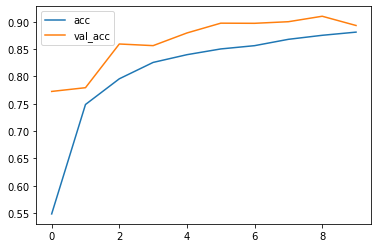

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.legend()

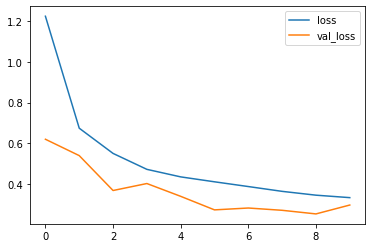

In [21]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [25]:
x_test = tf.image.resize(x_test,(150,150))

In [31]:
test_generator = ImageDataGenerator(
    rescale=1./255
)

test_generator.fit(x_test)

test_generator = test_generator.flow(
        x_test,
        y_test,
        batch_size=200)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

50/50 [==============================] - 744s 15s/step - loss: 0.2988 - acc: 0.8888
test acc: 0.8888000249862671


In [32]:
model = keras.models.load_model('best_weights.hdf5')


In [30]:
test_generator = ImageDataGenerator(
    rescale=1./255
)

test_generator.fit(x_test)

test_generator = test_generator.flow(
        x_test,
        y_test,
        batch_size=200)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

50/50 [==============================] - 755s 15s/step - loss: 0.2988 - acc: 0.8888
test acc: 0.8888000249862671
